In [1]:
import pandas as pd

In [2]:
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pip install fake-useragent

In [4]:
#pip install --upgrade fake-useragent

In [5]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/532.0 (KHTML, like Gecko) Chrome/4.0.212.0 Safari/532.0'

In [138]:
from selenium import webdriver #робот, который проходит по страничкам в хроме
from selenium.webdriver.common.keys import Keys #ввод данных в поле "Поиск"
from selenium import webdriver 
from bs4 import BeautifulSoup
import random
from time import sleep

In [123]:
#pip install selenium

In [124]:
#pip install webdriver_manager

In [125]:
#pip install -U selenium

In [10]:
driver = webdriver.Chrome()

In [11]:
url = 'https://odintsovo.cian.ru/sale/flat/287130709/'

In [12]:
driver.get(url)

In [13]:
my_page = BeautifulSoup(driver.page_source)

In [14]:
my_page.html.head.title

<title>Продажа двухкомнатной квартиры 51м² ул. Говорова, 30, Одинцово, Московская область, мкр. 5-й м. Баковка - база ЦИАН, объявление 287130709</title>

In [15]:
data = my_page.find_all('span', {'class' : 'a10a3f92e9--color_black_100--kPHhJ a10a3f92e9--lineHeight_6u--A1GMI a10a3f92e9--fontWeight_bold--ePDnv a10a3f92e9--fontSize_16px--RB9YW a10a3f92e9--display_block--pDAEx a10a3f92e9--text--g9xAG'})
data[:5]

[]

In [16]:
data = my_page.find_all('span', {'class' : 'a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY'})
data[:5]

[<span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing:-0.2px">51 м²</span>,
 <span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing:-0.2px">30 м²</span>,
 <span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing:-0.2px">10 м²</span>,
 <span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing:-0.2px">9 из 1

In [17]:
flat_data = []

for i in range(5):
    flat_data.append(data[i].text.split()[0])
    
flat_data

['51', '30', '10', '9', '2004']

In [18]:
price = my_page.find_all('span', {'class' : 'a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_9u--limEs a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_28px--P1gR4 a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY'})
price[:5]

[<span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_9u--limEs a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_28px--P1gR4 a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing: -0.5px;">Реальные ипотечные ставки от 10 банков - 3,8% на новостройки, 7,9% на вторичку</span>,
 <span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_9u--limEs a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_28px--P1gR4 a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing:-0.5px">11 500 000 ₽</span>,
 <span class="a10a3f92e9--color_black_100--Ephi7 a10a3f92e9--lineHeight_9u--limEs a10a3f92e9--fontWeight_bold--BbhnX a10a3f92e9--fontSize_28px--P1gR4 a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY" style="letter-spacing: -0.5px;">Похожие объявления</span>]

In [21]:
my_page.find_all('script')

[<script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script>,
 <script async="" src="//tags.soloway.ru/DSPCounter.min.js"></script>,
 <script async="" src="https://websdk.appsflyer.com?st=pba&amp;af_id=fbf26c30-fda3-4ee9-a424-abe0376edd18"></script>,
 <script async="" src="https://mc.yandex.ru/metrika/tag.js"></script>,
 <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script>,
 <script async="" id="tmr-code" src="https://top-fwz1.mail.ru/js/code.js" type="text/javascript"></script>,
 <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-3369S417EL&amp;l=dataLayer&amp;cx=c" type="text/javascript"></script>,
 <script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=37.29639800,55.68908000&amp;z=15&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_37_29639800_55_68908000_z_15_lang_ru_RU"></script>,
 <script async="" data-analytics

In [22]:
my_page.find_all('script')[7]

<script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=37.29639800,55.68908000&amp;z=15&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_37_29639800_55_68908000_z_15_lang_ru_RU"></script>

In [ ]:
my_page.find_all('script')[7]

In [33]:
flat_dict = {'area':flat_data[0],
             'living_area':flat_data[1],
             'kitchen_area':flat_data[2],
             'floor':flat_data[3],
             'year_build':flat_data[4],
            'price':int(''.join(price[1].text.split()[:-1])),
            'lattitude?':str(my_page.find_all('script')[7]).split('&amp')[1].replace(';','')[3:].split(',')[0],
            'longitude?':str(my_page.find_all('script')[7]).split('&amp')[1].replace(';','')[3:].split(',')[1]}

In [34]:
df = pd.DataFrame(data=flat_dict,index=[0])
df.head()

,area,living_area,kitchen_area,floor,year_build,price,lattitude?,longitude?
0,51,30,10,9,2004,11500000,37.29639800,55.68908000


# Выведем несколько десятков квартир из Одинцово

In [126]:
url = 'https://odintsovo.cian.ru/kupit-kvartiru-1-komn-ili-2-komn/'

In [127]:
driver.get(url)

In [128]:
my_page = BeautifulSoup(driver.page_source)

In [129]:
print(my_page.prettify())

<html lang="ru">
 <head>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="//tags.soloway.ru/DSPCounter.min.js">
  </script>
  <script async="" src="https://websdk.appsflyer.com?st=pba&amp;af_id=fbf26c30-fda3-4ee9-a424-abe0376edd18">
  </script>
  <script async="" src="https://mc.yandex.ru/metrika/tag.js">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" data-analytics-api-url="//sopr-api.cian.ru/collect/" data-profile-session-key="346FA89C-4A73-11EE-AF43-DCBC63DCE4AB" src="//cdn.cian.site/frontend/ca/ca.js">
  </script>
  <script async="" id="tmr-code" src="https://top-fwz1.mail.ru/js/code.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-3369S417EL&amp;l=dataLayer&amp;cx=c" type="text/javascript">
  </script>
  <script async="" src="//www.googletagmanage

In [131]:
urls = []

for link in my_page.find_all('a'):
    try:
        if '/sale/flat/' in link.get('href') and '/export/pdf' not in link.get('href'):
            urls.append(link.get('href'))
        else:
            print('no such thing')
    except:
        print('no such thing')
urls

no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no such thing
no suc

['https://odintsovo.cian.ru/sale/flat/291757992/',
 'https://odintsovo.cian.ru/sale/flat/291757992/',
 'https://odintsovo.cian.ru/sale/flat/291757992/',
 'https://odintsovo.cian.ru/sale/flat/291866278/',
 'https://odintsovo.cian.ru/sale/flat/291866278/',
 'https://odintsovo.cian.ru/sale/flat/291866278/',
 'https://odintsovo.cian.ru/sale/flat/286095383/',
 'https://odintsovo.cian.ru/sale/flat/286095383/',
 'https://odintsovo.cian.ru/sale/flat/286095383/',
 'https://odintsovo.cian.ru/sale/flat/290237382/',
 'https://odintsovo.cian.ru/sale/flat/290237382/',
 'https://odintsovo.cian.ru/sale/flat/290237382/',
 'https://odintsovo.cian.ru/sale/flat/290440131/',
 'https://odintsovo.cian.ru/sale/flat/290440131/',
 'https://odintsovo.cian.ru/sale/flat/290440131/',
 'https://odintsovo.cian.ru/sale/flat/291086158/',
 'https://odintsovo.cian.ru/sale/flat/291086158/',
 'https://odintsovo.cian.ru/sale/flat/291086158/',
 'https://odintsovo.cian.ru/sale/flat/283551847/',
 'https://odintsovo.cian.ru/sal

In [ ]:
for flat in urls:
    sleep(random.uniform(1., 10.))
    driver.get(url)
    sleep(random.uniform(3., 10.))
    my_page = BeautifulSoup(driver.page_source)
    

In [139]:
driver.get(urls[50])

In [140]:
my_page = BeautifulSoup(driver.page_source)

<html lang="ru">
 <head>
  <script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=37.27253511,55.65768582&amp;z=15&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_37_27253511_55_65768582_z_15_lang_ru_RU">
  </script>
  <script charset="utf-8" src="https://enterprise.api-maps.yandex.ru/services/coverage/v2/?l=map&amp;ll=37.27253511,55.65768582&amp;z=16&amp;lang=ru_RU&amp;callback=jsonp_yandex_coverage__l_map_ll_37_27253511_55_65768582_z_16_lang_ru_RU">
  </script>
  <meta content="Az520Inasey3TAyqLyojQa8MnmCALSEU29yQFW8dePZ7xQTvSt73pHazLFTK5f7SyLUJSo2uKLesEtEa9aUYcgMAAACPeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZyIsImV4cGlyeSI6MTcyNTQwNzk5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=" http-equiv="origin-trial"/>
  <script async="" src="//tags.soloway.ru/DSPCounter.min.js">
  </script>
  <script async="" src="https://websdk.appsflyer.com?st=pba&amp;af_i
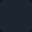
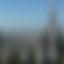

In [142]:
print(my_page.prettify())

In [143]:
flat_dict = {'area':flat_data[0],
             'living_area':flat_data[1],
             'kitchen_area':flat_data[2],
             'floor':flat_data[3],
             'year_build':flat_data[4],
            'price':int(''.join(price[1].text.split()[:-1])),
            'lattitude?':str(my_page.find_all('script')[7]).split('&amp')[1].replace(';','')[3:].split(',')[0],
            'longitude?':str(my_page.find_all('script')[7]).split('&amp')[1].replace(';','')[3:].split(',')[1]}

IndexError: list index out of range

In [ ]:
df = pd.DataFrame(data=flat_dict,index=[0])
df.head()

# Вытаскиваем все ссылки с первой страницы

In [374]:
url = 'https://odintsovo.cian.ru/kupit-kvartiru-1-komn-ili-2-komn/'

In [375]:
driver.get(url)

In [376]:
my_page = BeautifulSoup(driver.page_source)

In [394]:
def get_links(first_link):
    
    driver.get(first_link)
    sleep(random.uniform(5., 7.))
    
    my_page = BeautifulSoup(driver.page_source)
    
    urls = []
    
    for link in my_page.find_all('a'):
        try:
            if '/sale/flat/' in link.get('href') and '/export/pdf' not in link.get('href'):
                urls.append(link.get('href'))
        except Exception:
            pass
    return urls

In [396]:
first_page_links = get_links('https://odintsovo.cian.ru/kupit-kvartiru-1-komn-ili-2-komn/')
first_page_links[:5]

['https://odintsovo.cian.ru/sale/flat/291777057/',
 'https://odintsovo.cian.ru/sale/flat/291777057/',
 'https://odintsovo.cian.ru/sale/flat/291777057/',
 'https://odintsovo.cian.ru/sale/flat/291866278/',
 'https://odintsovo.cian.ru/sale/flat/291866278/']

# Начинаем собирать данные о квартирах

In [397]:
driver.get(first_page_links[0])

# Вытаскиваем гео данные

In [367]:
def get_longitude(page_data):
    long_data = []
    
    for i in page_data.find_all('script'):
        try:
            if 'll=' in i.get('src'):
                long_data.append(str(i).split('&amp')[1].replace(';','')[3:].split(',')[0])
                long_data.append(str(i).split('&amp')[1].replace(';','')[3:].split(',')[1])
        except Exception:
            pass
    return list(set(long_data))

In [372]:
url = 'https://odintsovo.cian.ru/sale/flat/287130709/'

driver.get(url)

my_page = BeautifulSoup(driver.page_source)

In [373]:
get_longitude(my_page)

['55.68908000', '37.29639800']

In [155]:
driver.close()

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=116.0.5845.110)
Stacktrace:
0   chromedriver                        0x00000001008f665c chromedriver + 4318812
1   chromedriver                        0x00000001008eed00 chromedriver + 4287744
2   chromedriver                        0x00000001005207ec chromedriver + 296940
3   chromedriver                        0x0000000100505a48 chromedriver + 186952
4   chromedriver                        0x0000000100506c30 chromedriver + 191536
5   chromedriver                        0x00000001004f6dec chromedriver + 126444
6   chromedriver                        0x00000001004f7afc chromedriver + 129788
7   chromedriver                        0x0000000100589890 chromedriver + 727184
8   chromedriver                        0x0000000100552178 chromedriver + 500088
9   chromedriver                        0x0000000100552fc0 chromedriver + 503744
10  chromedriver                        0x00000001008b6c40 chromedriver + 4058176
11  chromedriver                        0x00000001008bb160 chromedriver + 4075872
12  chromedriver                        0x000000010087ee68 chromedriver + 3829352
13  chromedriver                        0x00000001008bbc4c chromedriver + 4078668
14  chromedriver                        0x0000000100893f08 chromedriver + 3915528
15  chromedriver                        0x00000001008d8140 chromedriver + 4194624
16  chromedriver                        0x00000001008d82c4 chromedriver + 4195012
17  chromedriver                        0x00000001008e84d0 chromedriver + 4261072
18  libsystem_pthread.dylib             0x000000018690ffa8 _pthread_start + 148
19  libsystem_pthread.dylib             0x000000018690ada0 thread_start + 8
